### Horse or Human Image Classification with CNN

#### Dataset source
- Training data : "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
- Validation data : "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"

#### Dataset specifications :
- Size (px) : 300 x 300 x 3
- Number of images (Training data) : 1027
- Number of images (Validation data) : 256

#### Interpretation :
- Our goal here is to classify whether an image is a human or a horse image and thus is binary classification. Sigmoid activation function is one of the activation functions that suits this and since ImageDataGenerator orders the output label in alphabetical order, we say if the value is closer to 0 then it is a horse's and a human's otherwise
- We make this classification under the assumption : if the predicted value is less than or equal 0.5 then it is a horse's and a human's otherwhise

In [1]:
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import tensorflow as tf

In [2]:
training_dir = 'horse-or-human\\training'
validation_dir = 'horse-or-human\\validation'

![Directory Structure](./src/img/dir_struct.png)

In [3]:
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest'
)


In [4]:
validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        class_mode='binary')

Found 256 images belonging to 2 classes.


In [5]:
train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size=(300, 300),
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

In [79]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 35, 35, 64)      

In [81]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [82]:
history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator)

C:\Users\user\AppData\Local\Temp\ipykernel_16168\1614825642.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
33/33 [==============================] - 74s 2s/step - loss: 0.7665 - accuracy: 0.5648 - val_loss: 0.6859 - val_accuracy: 0.5000
Epoch 2/15
33/33 [==============================] - 72s 2s/step - loss: 0.6514 - accuracy: 0.6426 - val_loss: 0.6133 - val_accuracy: 0.6445
Epoch 3/15
33/33 [==============================] - 92s 3s/step - loss: 0.5567 - accuracy: 0.7556 - val_loss: 0.8769 - val_accuracy: 0.5430
Epoch 4/15
33/33 [==============================] - 86s 3s/step - loss: 0.5020 - accuracy: 0.7809 - val_loss: 0.7325 - val_accuracy: 0.6797
Epoch 5/15
33/33 [==============================] - 88s 3s/step - loss: 0.4340 - accuracy: 0.8140 - val_loss: 1.3590 - val_accuracy: 0.6953
Epoch 6/15
33/33 [==============================] - 81s 2s/step - loss: 0.3870 - accuracy: 0.8559 - val_loss: 0.7823 - val_accuracy: 0.6523
Epoch 7/15
33/33 [==============================] - 79s 2s/step - loss: 0.2923 - accuracy: 0.8783 - val_loss: 0.5720 - val_accuracy: 0.8008
Epoch 8/15
33/33 [==

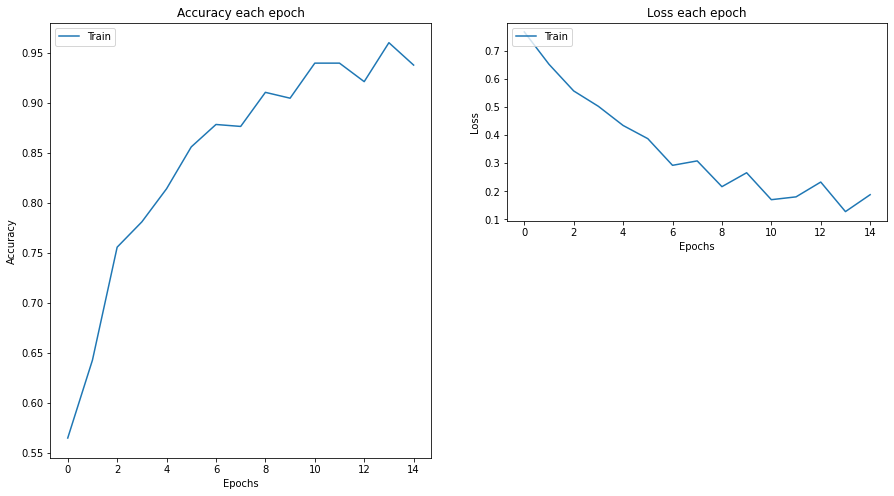

In [83]:
plt.figure(figsize = (15 , 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title("Accuracy each epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train"], loc="upper left")

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'])
plt.title("Loss each epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train"], loc="upper left")

In [84]:
model.save('tf.model\\no_dropout\\my_model.h5')

In [89]:
correct = 0
for key, val in test.items():
    if val == predict(key, model):
        correct += 1

1/1 [==============================] - 0s 92ms/step


In [86]:
print(f"correct : {correct} out of {len(test.keys())}")

correct : 11 out of 20


### Applying dropout reguralization with 20% percentage

In [90]:
model_dropout = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [91]:
model_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 35, 35, 64)      

In [92]:
model_dropout.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [93]:
history_dropout = model_dropout.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator)

C:\Users\user\AppData\Local\Temp\ipykernel_16168\3977858232.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_dropout = model_dropout.fit_generator(


Epoch 1/15
33/33 [==============================] - 94s 3s/step - loss: 0.7147 - accuracy: 0.5326 - val_loss: 0.6778 - val_accuracy: 0.5625
Epoch 2/15
33/33 [==============================] - 98s 3s/step - loss: 0.6564 - accuracy: 0.6475 - val_loss: 0.6289 - val_accuracy: 0.6328
Epoch 3/15
33/33 [==============================] - 105s 3s/step - loss: 0.4991 - accuracy: 0.7595 - val_loss: 1.3373 - val_accuracy: 0.5312
Epoch 4/15
33/33 [==============================] - 96s 3s/step - loss: 0.4012 - accuracy: 0.8374 - val_loss: 1.1818 - val_accuracy: 0.7188
Epoch 5/15
33/33 [==============================] - 100s 3s/step - loss: 0.3270 - accuracy: 0.8685 - val_loss: 0.7003 - val_accuracy: 0.8203
Epoch 6/15
33/33 [==============================] - 97s 3s/step - loss: 0.3008 - accuracy: 0.8793 - val_loss: 3.8032 - val_accuracy: 0.6211
Epoch 7/15
33/33 [==============================] - 104s 3s/step - loss: 0.2683 - accuracy: 0.9007 - val_loss: 0.8750 - val_accuracy: 0.7812
Epoch 8/15
33/33 

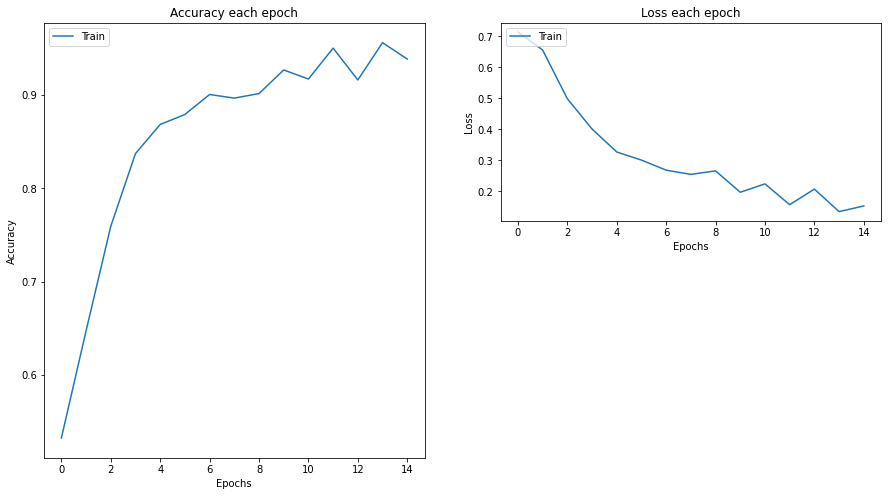

In [96]:
plt.figure(figsize = (15 , 8))
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'])
plt.title("Accuracy each epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train"], loc="upper left")

plt.subplot(2, 2, 2)
plt.plot(history_dropout.history['loss'])
plt.title("Loss each epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train"], loc="upper left")

In [97]:
model_dropout.save('tf.model\\post_dropout\\my_model_2.h5')

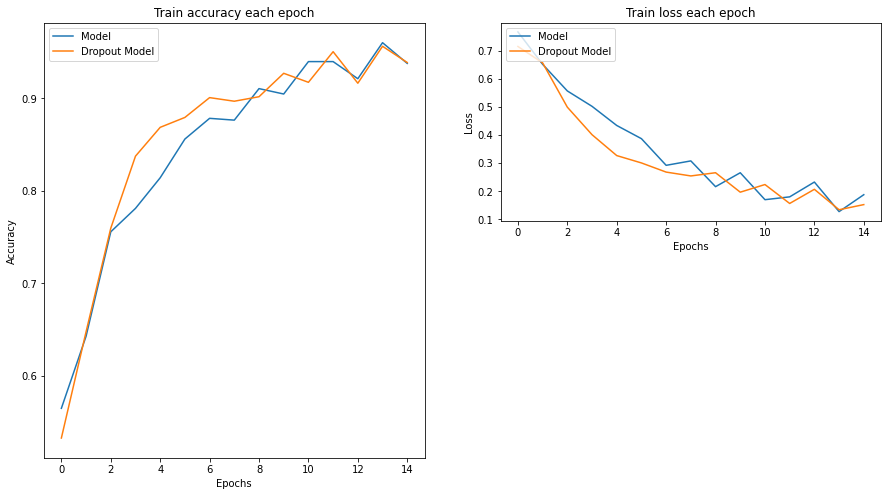

In [100]:
plt.figure(figsize = (15 , 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history_dropout.history['accuracy'])
plt.title("Train accuracy each epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Model", "Dropout Model"], loc="upper left")

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history_dropout.history['loss'])
plt.title("Train loss each epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Model", "Dropout Model"], loc="upper left")

In [99]:
predict_n(model_dropout)

1/1 [==============================] - 0s 37ms/step
correct : 8 out of 20


## Test section

#### Testing properties

In [72]:
def predict_plot(path):
    img = utils.load_img(path, target_size=(300, 300))
    x = utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    image_tensor = np.vstack([x])
    classes = model.predict(image_tensor)
    
    plt.imshow(img)
    
    if(classes[0] > 0.5):
        print("\nPredicted as human")
    else:
        print("\nPredicted as horse")

In [87]:
def predict(path, model):
    img = utils.load_img(path, target_size=(300, 300))
    x = utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    image_tensor = np.vstack([x])
    classes = model.predict(image_tensor)
    
    
    if(classes[0] > 0.5):
        return 'human'
    else:
        return 'horse'

In [88]:
relative_path = 'sample_images\\'
test = {
    relative_path + 'female-human.jpg' : 'human',
    relative_path + 'female-human-2.jpg' : 'human',
    relative_path + 'female-human-3.jpg' : 'human',
    relative_path + 'female-human-4.jpg' : 'human',
    relative_path + 'female-human-5.jpg' : 'human',
    relative_path + 'female-human-5.jpg' : 'human',
    relative_path + 'male-human.jpg' : 'human',
    relative_path + 'male-human-2.jpg' : 'human',
    relative_path + 'male-human-3.jpg' : 'human',
    relative_path + 'male-human-4.jpg' : 'human',
    relative_path + 'male-human-5.jpg' : 'human',
    relative_path + 'horse.jpg' : 'horse',
    relative_path + 'horse-2.jpg' : 'horse',
    relative_path + 'horse-3.jpg' : 'horse',
    relative_path + 'horse-4.jpg' : 'horse',
    relative_path + 'horse-5.jpg' : 'horse',
    relative_path + 'horse-6.jpg' : 'horse',
    relative_path + 'horse-7.jpg' : 'horse',
    relative_path + 'horse-8.jpg' : 'horse',
    relative_path + 'horse-9.jpg' : 'horse',
    relative_path + 'horse-10.jpg' : 'horse',
}

In [98]:
def predict_n(model):
    correct = 0
    for key, val in test.items():
        if val == predict(key, model):
            correct += 1
    print(f"correct : {correct} out of {len(test.keys())}")